In [6]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
plt.rcParams.update({'font.size':14})

## Solution: Fitting lightcurves

In [2]:
lc_df = pd.read_csv('./data/HV00872_phot.csv')

In [3]:
lc_df

,phase,mag_1,err_mag_1,mag_2,err_mag_2
0,0.919,11.568,0.013,11.605,0.014
1,0.969,11.510,0.013,11.498,0.013
2,0.992,11.485,0.012,11.471,0.014
3,0.048,11.396,0.013,11.372,0.013
4,0.080,11.378,0.012,11.330,0.013
5,0.127,11.334,0.011,11.296,0.013
6,0.161,11.268,0.011,11.276,0.012
7,0.197,11.244,0.012,11.255,0.012
8,0.244,11.205,0.011,11.235,0.013
9,0.301,11.182,0.011,11.232,0.012


In [4]:
def lightcurve(phase, m0, A, delta):
    m = m0 + A*np.sin(2*np.pi*phase + delta)
    return(m)


In [15]:
popt_1, pcov_1 = curve_fit(lightcurve,lc_df['phase'], lc_df['mag_1'])


In [16]:
popt_1

array([11.31741618,  0.17472253,  2.20152525])

In [17]:
pcov_1

array([[3.20492060e-05, 2.58295639e-06, 2.91783750e-06],
       [2.58295639e-06, 6.82718478e-05, 5.78559829e-06],
       [2.91783750e-06, 5.78559829e-06, 1.97336084e-03]])

In [18]:
m0_1 = popt_1[0]
A_1 = popt_1[1]
delta_1 = popt_1[2]


In [19]:
err_m0_1 = np.sqrt(pcov_1[0][0])
err_A_1 = np.sqrt(float(pcov_1[1][1]))
err_delta_1 = np.sqrt(float(pcov_1[2][2]))

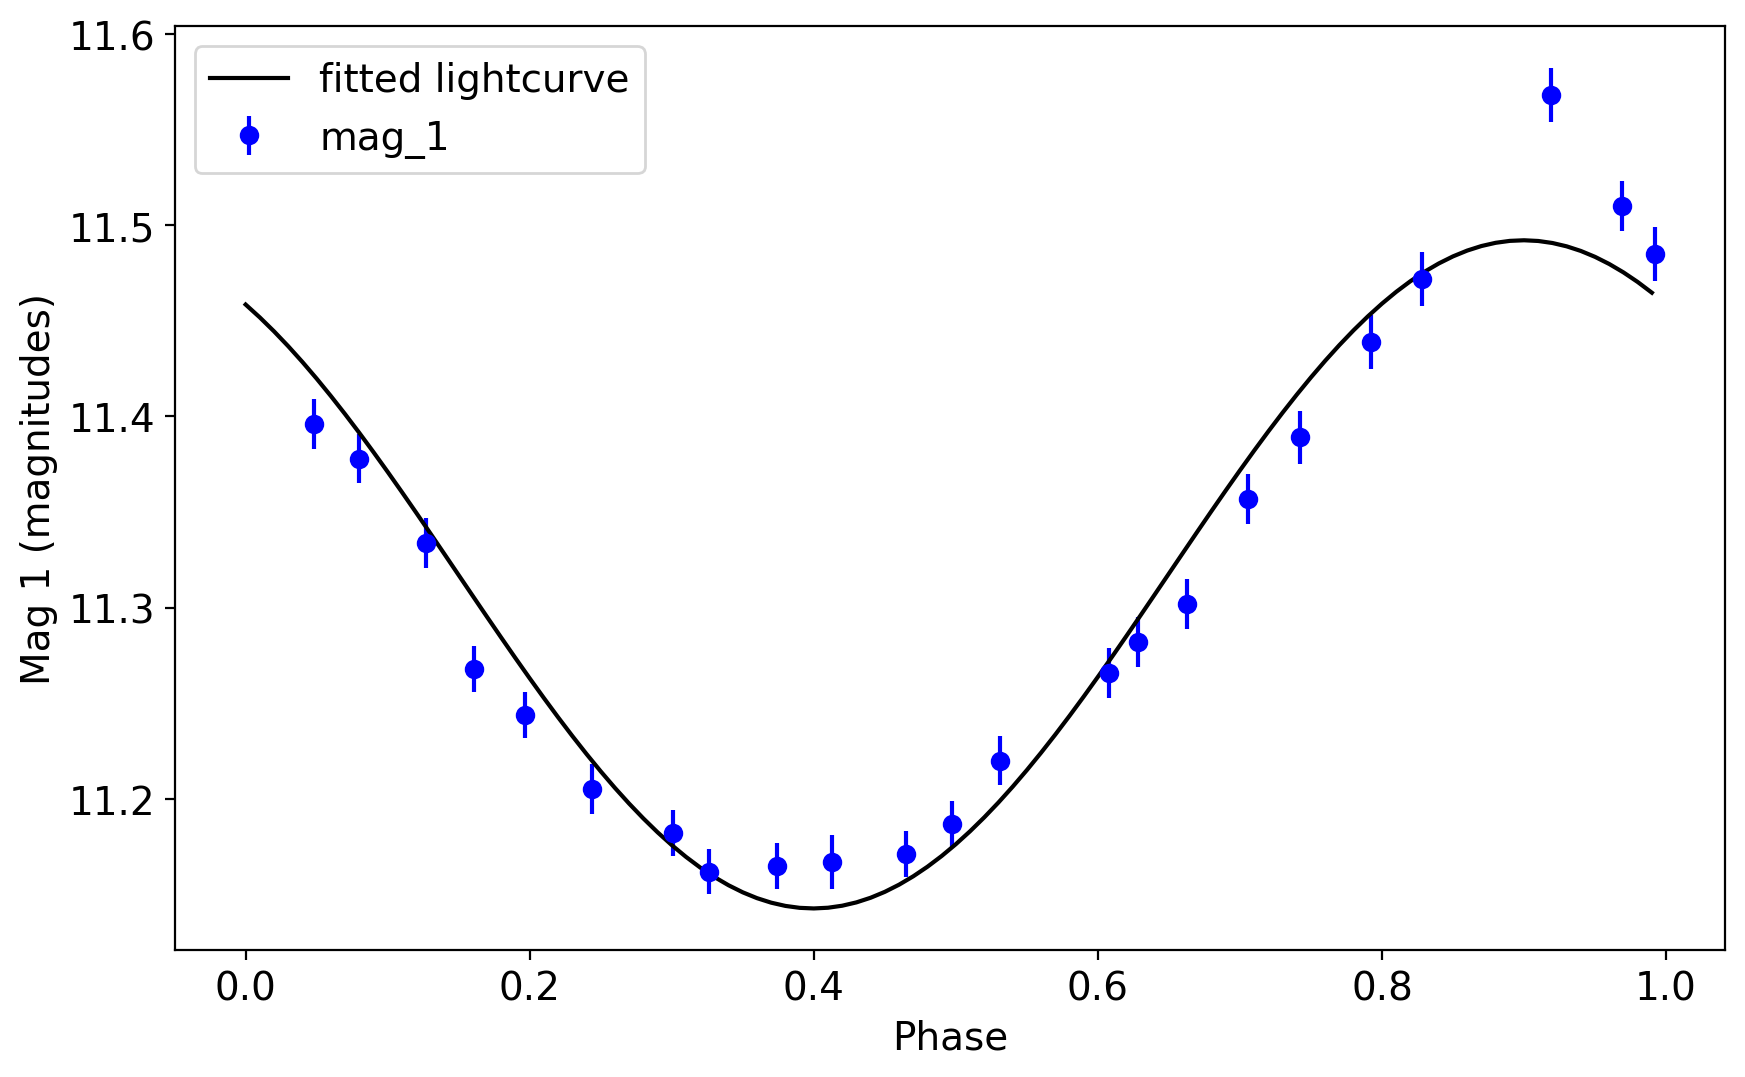

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(lc_df['phase'], lc_df['mag_1'], yerr=lc_df['err_mag_2'],color='b', marker='o', linestyle='None', label='mag_1')
ax.set_xlabel('Phase')
ax.set_ylabel('Mag 1 (magnitudes)')

p = np.arange(0,1,0.01)

ax.plot(p, lightcurve(p, m0_1, A_1, delta_1), ls='-', color='k', label='fitted lightcurve')
ax.legend()

In [21]:
popt_2, pcov_2 = curve_fit(lightcurve,lc_df['phase'], lc_df['mag_2'])
m0_2 = popt_2[0]
A_2 = popt_2[1]
delta_2 = popt_2[2]
err_m0_2 = np.sqrt(pcov_2[0][0])
err_A_2 = np.sqrt(float(pcov_2[1][1]))
err_delta_2 = np.sqrt(float(pcov_2[2][2]))

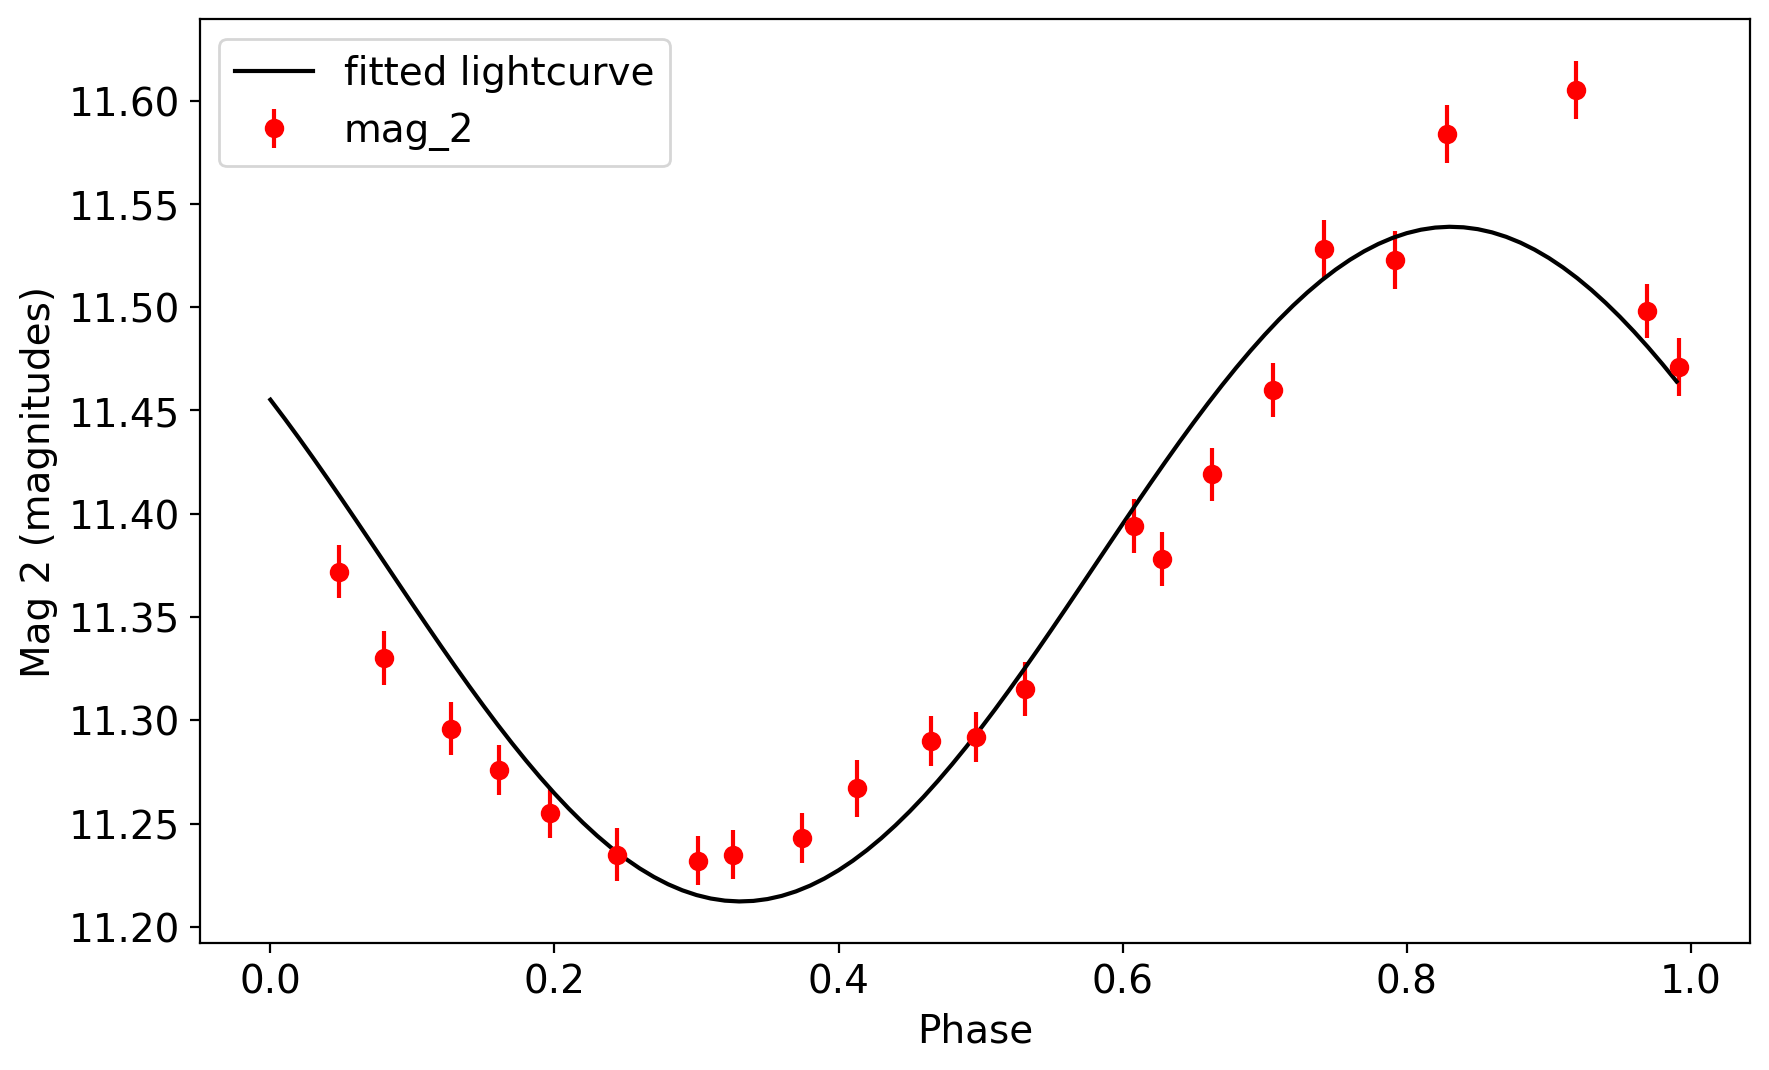

In [24]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(lc_df['phase'], lc_df['mag_2'], yerr=lc_df['err_mag_2'], color='r', marker='o', linestyle='None', label='mag_2')
ax.set_xlabel('Phase')
ax.set_ylabel('Mag 2 (magnitudes)')

p = np.arange(0,1,0.01)

ax.plot(p, lightcurve(p, m0_2, A_2, delta_2), ls='-', color='k', label='fitted lightcurve')
ax.legend()

putting them together on the same plot:

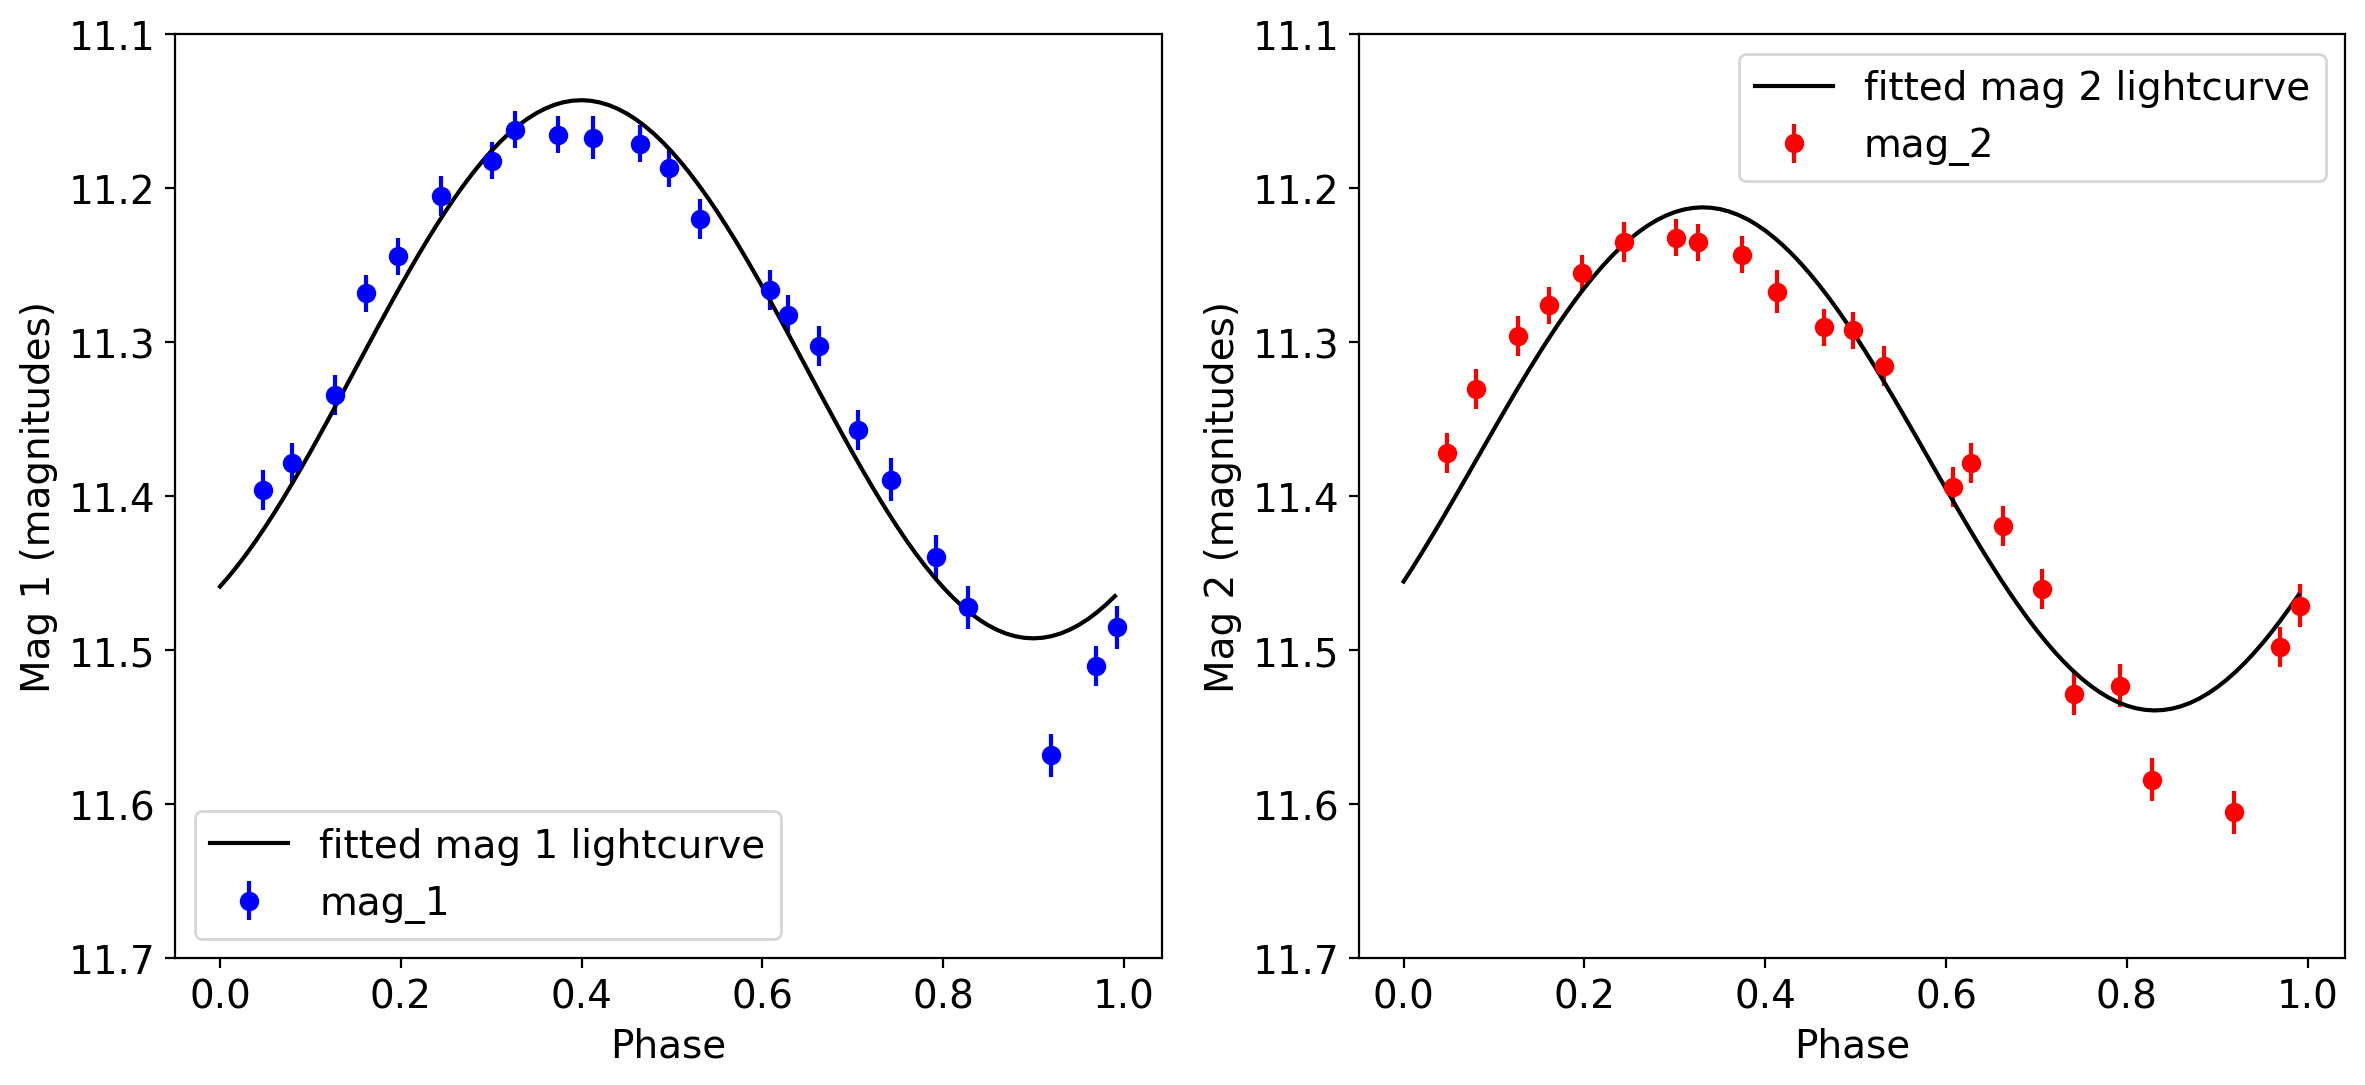

In [44]:
fig = plt.figure(figsize=(14,6))

p = np.arange(0,1,0.01)


ax1 = fig.add_subplot(1,2,1)
ax1.errorbar(lc_df['phase'], lc_df['mag_1'], yerr=lc_df['err_mag_2'],color='b', marker='o', linestyle='None', label='mag_1')
ax1.set_xlabel('Phase')
ax1.set_ylabel('Mag 1 (magnitudes)')

ax1.plot(p, lightcurve(p, m0_1, A_1, delta_1), ls='-', color='k', label='fitted mag 1 lightcurve')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.errorbar(lc_df['phase'], lc_df['mag_2'], yerr=lc_df['err_mag_2'], color='r', marker='o', linestyle='None', label='mag_2')
ax2.set_xlabel('Phase')
ax2.set_ylabel('Mag 2 (magnitudes)')

ax2.plot(p, lightcurve(p, m0_2, A_2, delta_2), ls='-', color='k', label='fitted mag 2 lightcurve')
ax2.legend()

ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.set_ylim(11.7, 11.1)
ax2.set_ylim(11.7, 11.1)

plt.show();

can extend this to get a better fit. Add additional terms (Fourier series)

new function to fit:

$$m = m_0 + A \sin\left(2 \pi \phi  + \delta\right) +  B \sin\left(4 \pi \phi  + \delta\right)  $$

In [36]:
def fancy_lightcurve(phase, m0, A, B, delta):
    m = m0 + A*np.sin(2*np.pi*phase + delta) + B*np.sin(4*np.pi*phase + delta)
    return(m)

In [37]:
popt_1_fancy, pcov_1_fancy = curve_fit(fancy_lightcurve,lc_df['phase'], lc_df['mag_1'])
m0_1_f = popt_1_fancy[0]
A_1_f = popt_1_fancy[1]
B_1_f = popt_1_fancy[2]
delta_1_f = popt_1_fancy[3]

popt_2_fancy, pcov_2_fancy = curve_fit(fancy_lightcurve,lc_df['phase'], lc_df['mag_2'])
m0_2_f = popt_2_fancy[0]
A_2_f = popt_2_fancy[1]
B_2_f = popt_2_fancy[2]
delta_2_f = popt_2_fancy[3]

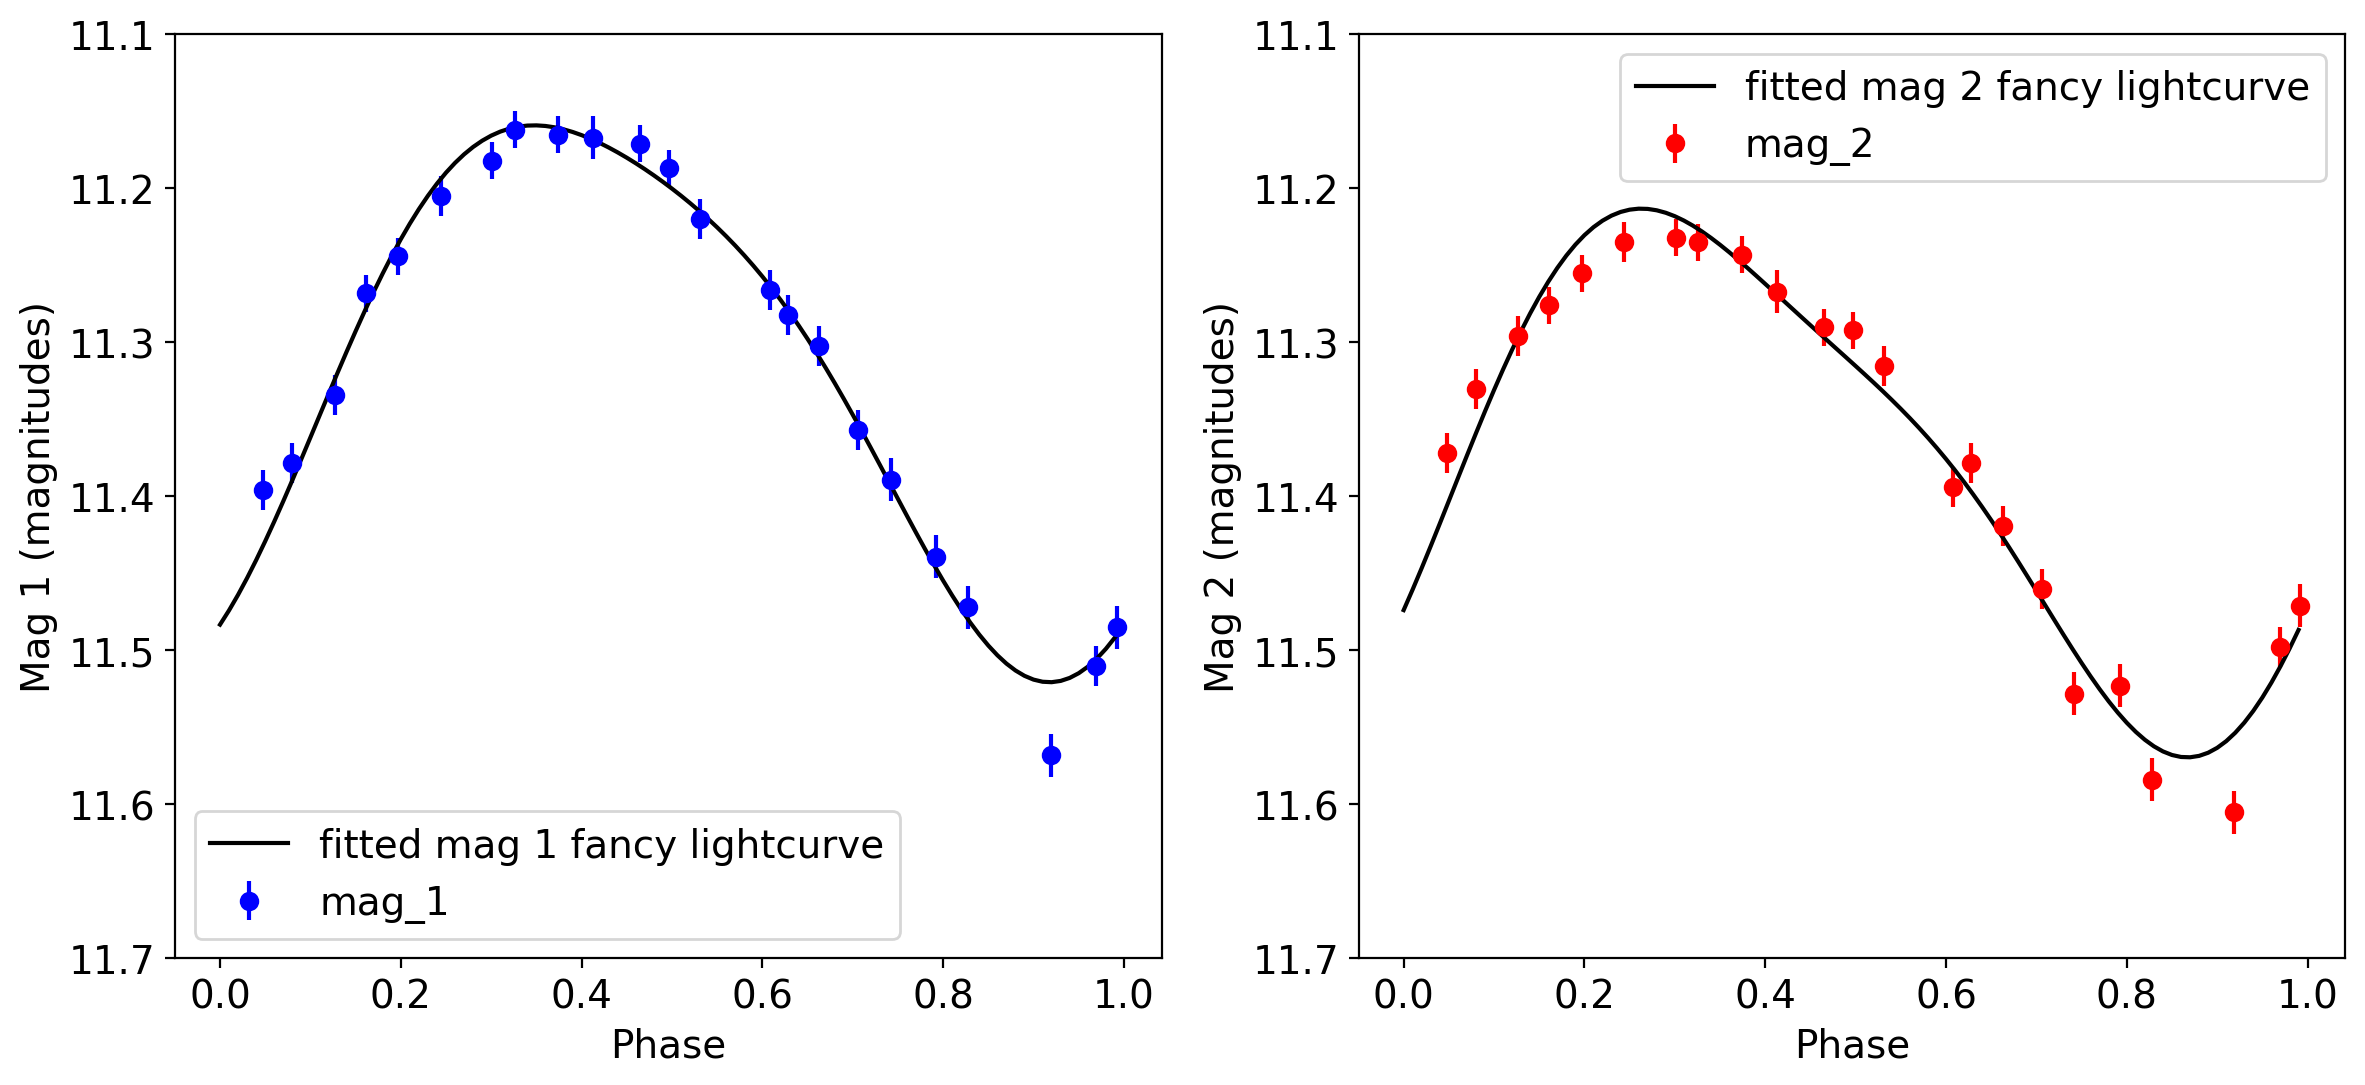

In [43]:
fig = plt.figure(figsize=(14,6))

p = np.arange(0,1,0.01)


ax1 = fig.add_subplot(1,2,1)
ax1.errorbar(lc_df['phase'], lc_df['mag_1'], yerr=lc_df['err_mag_2'],color='b', marker='o', linestyle='None', label='mag_1')
ax1.set_xlabel('Phase')
ax1.set_ylabel('Mag 1 (magnitudes)')

ax1.plot(p, fancy_lightcurve(p, m0_1_f, A_1_f, B_1_f, delta_1_f), ls='-', color='k', label='fitted mag 1 fancy lightcurve')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.errorbar(lc_df['phase'], lc_df['mag_2'], yerr=lc_df['err_mag_2'], color='r', marker='o', linestyle='None', label='mag_2')
ax2.set_xlabel('Phase')
ax2.set_ylabel('Mag 2 (magnitudes)')

ax2.plot(p, fancy_lightcurve(p, m0_2_f, A_2_f, B_2_f, delta_2_f), ls='-', color='k', label='fitted mag 2 fancy lightcurve')
ax2.legend()

ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_ylim(11.7, 11.1)
ax2.set_ylim(11.7, 11.1)


plt.show();